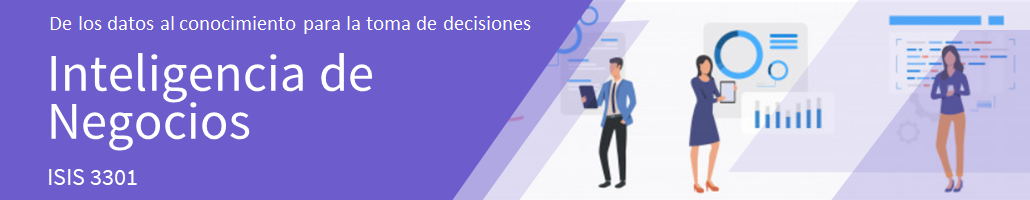

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolver una tarea de clasificación utilizando la librería scikit-learn. Tomaremos como caso de estudio el conjunto de empleados y veremos cómo realizar la preparación de los datos para el algoritmo de árboles de decisión. También conocerás algunas métricas para evaluar un modelo de clasificación y cómo estimar su capacidad de generalización. Además, veremos cómo ajustar los hiperparámetros del algoritmo con técnicas de validación. 
Se explicará paso a paso:

1. Preparar los datos para el modelado.
2. Crear un modelo de árbol de decisión.
3. Utilizar técnicas de validación para el ajuste de hiperparámetros propios de árboles de decisión.
4. Evaluar el modelo.
5. Interpretar el modelo con base en los objetivos de negocio.

Problema:
La deserción de empleados en las empresas (employee attrition) es un aspecto inevitable debido a variadas razones. Por ejemplo, el retiro puede obedecer a una actualización de conocimientos (estudios) que abre otras oportunidades para el trabajador; a razones familiares que impliquen mudarse lejos del lugar de trabajo; imperativos de salud y el haber cumplido con los requisitos para optar a la jubilación. Es decir, la disminución de una plantilla de empleados no obedece necesariamente a que aquellos tengan problemas con su empleador, sino que puede responder a factores relacionados con las condiciones y desarrollos de vida de cada uno. Sin embargo, para las empresas sería de gran valor identificar con suficiente antelación los empleados que podrían considerar el abandono de sus puestos de trabajo y los factores relacionados con estas decisiones. 

¿Cuáles son los objetivos de la empresa? ¿Qué tipo de aprendizaje y tarea utilizaría para resolverlos?


Diccionario:

Edad.Valor numérico

Renuncia.Empleado que renunció a la empresa (0=no, 1=sí)

Viaje_negocio (ocasional, frecuente, no_viaja)

Distancia_desde_casa. Valor numérico. Distabncia del trabajo al domicilio. 

Satisfacción_ambiente. Valor numérico.Satisfacción con el entorno de trabajo (1 "Baja" 2 "Media" 3 "Alta" 4 "Muy alta")

Género.(Femenino, Masculino)

Nivel_trabajo. Valor numérico.

Estatus_marital (Divorciado, Casado, Soltero)

Salario_mensual. Valor numérico.

No_compañías_anteriores. Valor numérico. No. de empresas en las que ha trabajado.

Sobretiempo (NO, SÍ)

Satisfacción_relaciones. Valor numérico.

Años_trabajo. Valor numérico. Total de años trabajados. 

Antigüedad. Valor numérico. Número total de años en la empresa. 

Años_cargo_actual. Valor numérico. Años en el cargo actual.

Última_promoción. Valor numérico. Años desde la última promoción.

Años_manager_actual. Valor numérico. Años con el gerente actual. 


### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [7]:
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn

In [8]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [10]:
# Se cargan los datos. 
data=pd.read_csv('data/Datos_empleados.csv', sep=';', encoding = 'utf-8')

In [11]:
# Cantidad de datos y número de variables
data.shape

(1470, 17)

In [12]:
# Mostrar los datos
data.head()

,Edad,Renuncia,Viaje_negocio,Distacia_desde_casa,Satisfacción_ambiente,Género,Nivel_trabajo,Estatus_marital,Salario_mensual,No_Compañías_anteriores,Sobretiempo,Satisfacción_relaciones,Años_trabajo,Antigüedad,Años_cargo_actual,Última_promoción,Años_manager_actual
0,41,SI,Ocasional,1,2,Femenino,2,Soltero,5993,8,SI,1,8,6,4,0,5
1,49,NO,Frecuentemente,8,3,Masculino,2,Casado,5130,1,NO,4,10,10,7,1,7
2,37,SI,Ocasional,2,4,Masculino,1,Soltero,2090,6,SI,2,7,0,0,0,0
3,33,NO,Frecuentemente,3,4,Femenino,1,Casado,2909,1,SI,3,8,8,7,3,0
4,27,NO,Ocasional,2,1,Masculino,1,Casado,3468,9,NO,4,6,2,2,2,2


In [13]:
# Podemos ver los tipos de todas la variables.
data.dtypes

Edad                        int64
Renuncia                   object
Viaje_negocio              object
Distacia_desde_casa         int64
Satisfacción_ambiente       int64
Género                     object
Nivel_trabajo               int64
Estatus_marital            object
Salario_mensual             int64
No_Compañías_anteriores     int64
Sobretiempo                object
Satisfacción_relaciones     int64
Años_trabajo                int64
Antigüedad                  int64
Años_cargo_actual           int64
Última_promoción            int64
Años_manager_actual         int64
dtype: object

### 3. Describir los datos
Ahora podemos hacer una descripción más detallada de nuestros datos.Ten en cuenta que este paso es muy importante para poder determinar problemas de calidad de datos. Además, nos dará información que será útil en la fase de preparación de datos.

In [14]:
# Se realiza el perfilamiento de los datos. En este, se genera información de tipo descriptivo para cada una de las 
# variables numéricas.
data.describe()

,Edad,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,Años_cargo_actual,Última_promoción,Años_manager_actual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.063946,6502.931293,2.693197,2.712245,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.093082,1.106940,4707.956783,2.498009,1.081209,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2911.000000,1.000000,2.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,4919.000000,2.000000,3.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,8379.000000,4.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,4.000000,5.000000,19999.000000,9.000000,4.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# Categorías que se presentan en la variable categórica "Viaje_negocio" y en qué proporción.
pd.value_counts(data['Viaje_negocio'])

Ocasional         1043
Frecuentemente     277
No-viaja           150
Name: Viaje_negocio, dtype: int64

In [16]:
# Categorías que se presentan en la variable categórica "Género" y en qué proporción.
pd.value_counts(data['Género'])

Masculino    882
Femenino     588
Name: Género, dtype: int64

In [17]:
# Categorías que se presentan en la variable categórica "Estatus_marital" y en qué proporción.
pd.value_counts(data['Estatus_marital'])

Casado        673
Soltero       470
Divorciado    327
Name: Estatus_marital, dtype: int64

In [18]:
# Categorías que se presentan en la variable categórica "Sobretiempo" y en qué proporción.
pd.value_counts(data['Sobretiempo'])

NO    1054
SI     416
Name: Sobretiempo, dtype: int64

Nuestra variable objetivo es "Renuncia", la cual indica si un empleado abandonó la empresa (SI) o se encuentra todavía laborando en esta.

In [19]:
# Categorías que se presentan en la variable categórica "Renuncia" y en qué proporción.
pd.value_counts(data['Renuncia'])

NO    1233
SI     237
Name: Renuncia, dtype: int64

In [20]:
# Se observa que no hay ausencias:
data.isnull().sum()

Edad                       0
Renuncia                   0
Viaje_negocio              0
Distacia_desde_casa        0
Satisfacción_ambiente      0
Género                     0
Nivel_trabajo              0
Estatus_marital            0
Salario_mensual            0
No_Compañías_anteriores    0
Sobretiempo                0
Satisfacción_relaciones    0
Años_trabajo               0
Antigüedad                 0
Años_cargo_actual          0
Última_promoción           0
Años_manager_actual        0
dtype: int64

### 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados con la eliminación de registros con ausencias y duplicados.

In [21]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data.copy()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [22]:
# Transformación de las variables categóricas de entrada
data_t = pd.get_dummies(data_t, columns=['Viaje_negocio','Género', 'Estatus_marital', 'Sobretiempo'])

In [23]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto.
codificacion = LabelEncoder()

In [24]:
# Ahora se ajusta a los datos.
data_t['Renuncia']=codificacion.fit_transform(data_t['Renuncia'])

In [25]:
# Visualización de la clase. Observamos que ahora la categoría "SI" está codificada con un "1" y la clase "NO" con un "0"
data_t['Renuncia'].value_counts()

0    1233
1     237
Name: Renuncia, dtype: int64

In [26]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,Edad,Renuncia,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,...,Viaje_negocio_Frecuentemente,Viaje_negocio_No-viaja,Viaje_negocio_Ocasional,Género_Femenino,Género_Masculino,Estatus_marital_Casado,Estatus_marital_Divorciado,Estatus_marital_Soltero,Sobretiempo_NO,Sobretiempo_SI
0,41,1,1,2,2,5993,8,1,8,6,...,0,0,1,1,0,0,0,1,0,1
1,49,0,8,3,2,5130,1,4,10,10,...,1,0,0,0,1,1,0,0,1,0
2,37,1,2,4,1,2090,6,2,7,0,...,0,0,1,0,1,0,0,1,0,1
3,33,0,3,4,1,2909,1,3,8,8,...,1,0,0,1,0,1,0,0,0,1
4,27,0,2,1,1,3468,9,4,6,2,...,0,0,1,0,1,1,0,0,1,0


In [27]:
#revisión del total de registros
data_t.shape

(1470, 23)

### 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [28]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['Renuncia']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['Renuncia'], axis=1)

¿Cómo determinar la capacidad de generalizacion del modelo?

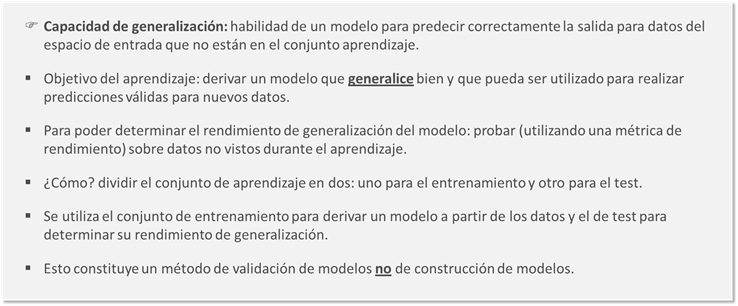

Para determinar el rendimiento del modelo sobre datos nuevos (rendimiento de generalización) dividimos nuestros datos en dos conjuntos: uno para el entrenamiento y otro para el test.

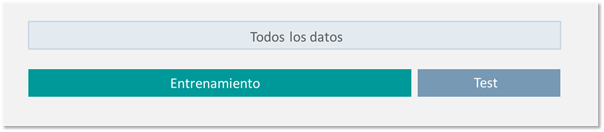

In [65]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [67]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)

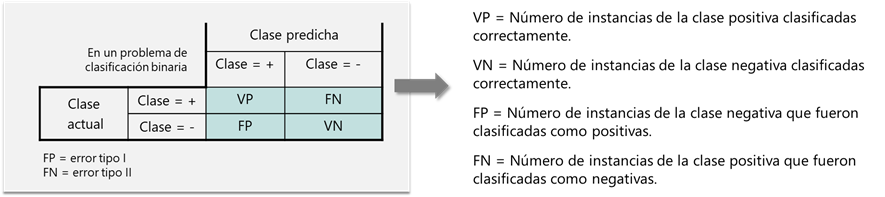

In [68]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [69]:
# Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

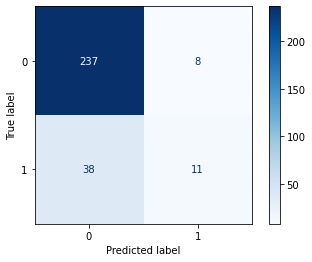

In [70]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

También podemos generar diferentes métricas de rendimiento como la exactitud, el recall, la precisión y la puntuación F1.  Entendamos cada una de ellas.

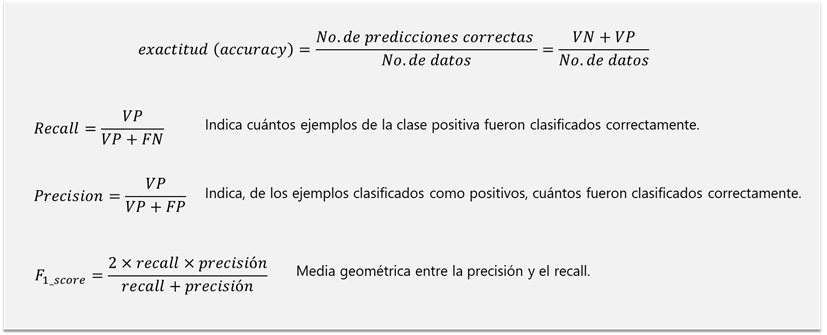

In [71]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.84
Recall: 0.22448979591836735
Precisión: 0.5789473684210527
Puntuación F1: 0.32352941176470584


Para tener una panorama completo podemos generar un reporte.

In [72]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       245
           1       0.58      0.22      0.32        49

    accuracy                           0.84       294
   macro avg       0.72      0.60      0.62       294
weighted avg       0.81      0.84      0.81       294



In [73]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 0.87
Recall: 0.28191489361702127
Precisión: 0.7464788732394366
Puntuación F1: 0.40926640926640934


Observa que hay un gran diferencia en los valores de las métricas de rendimiento sobre el conjunto de entrenamiento y sobre el conjunto test ¿Por qué crees que se produce este fenómeno?

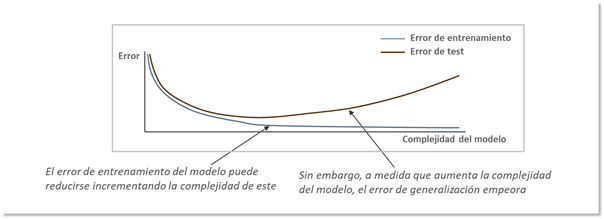

Tomar en cuenta:

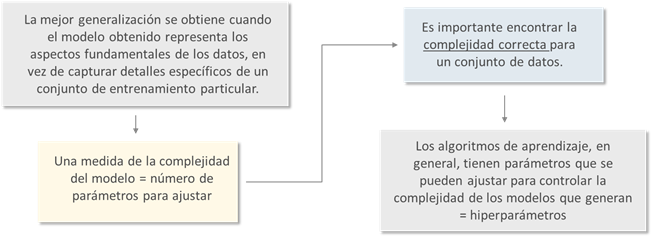

### 4.1. Interpretación del modelo. Aplica para árboles de decisión.
Podemos determinar cuáles atributos son los más importantes a partir del modelo generado. Recuerda que estos algoritmos realizan una selección en cada paso de construcción del árbol con base en la medida de pureza.

In [74]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= arbol.feature_importances_
importancia

array([0.09736096, 0.03056424, 0.05963036, 0.        , 0.20342009,
       0.07781969, 0.        , 0.05054193, 0.07675305, 0.        ,
       0.        , 0.03069571, 0.        , 0.        , 0.02417023,
       0.        , 0.        , 0.        , 0.04383135, 0.07277094,
       0.18058819, 0.05185325])

También podemos ordenar y tabular estos coeficientes para facilitar la interpretación.

In [75]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Salario_mensual,0.203420
1,Sobretiempo_NO,0.180588
2,Edad,0.097361
3,No_Compañías_anteriores,0.077820
4,Antigüedad,0.076753
5,Estatus_marital_Soltero,0.072771
6,Satisfacción_ambiente,0.059630
7,Sobretiempo_SI,0.051853
8,Años_trabajo,0.050542
9,Estatus_marital_Divorciado,0.043831


Ahora vamos a graficar el modelo. Para propósitos de visualización limitaremos la profundidad del árbol a 3. 

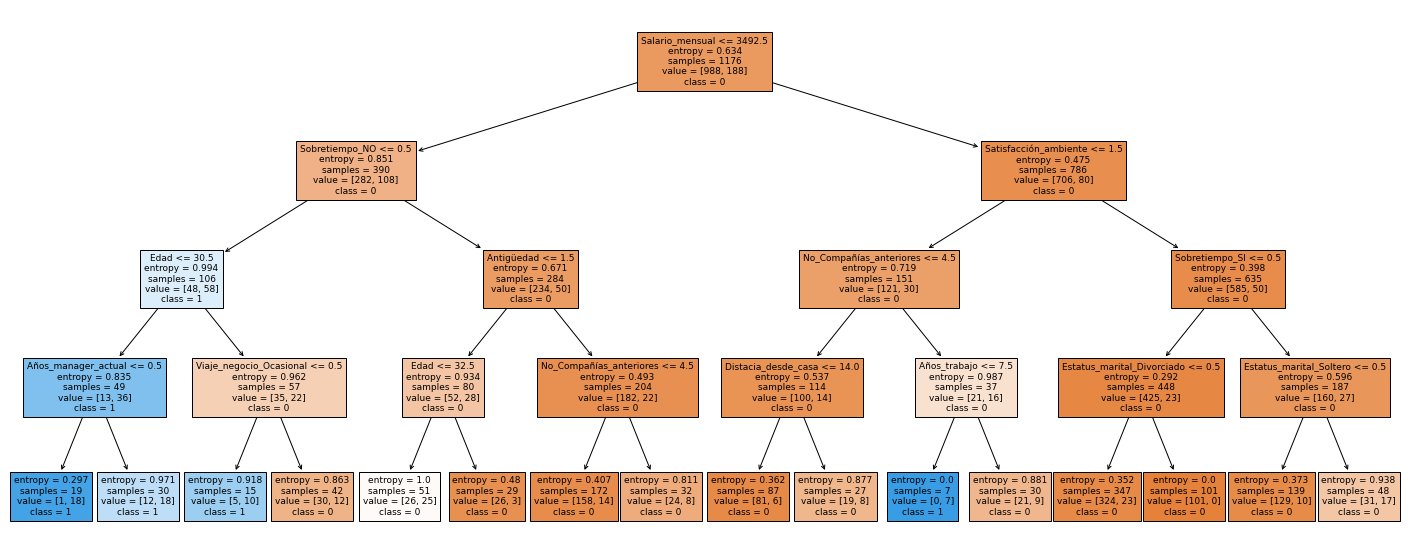

In [76]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=arbol.get_depth(), feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [77]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decistion_tree.png")

### 6. Construcción del modelo con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno.


¿Cómo saber los mejores valores de los hiperparámetro de un algoritmo? Estos hay que ajustarlo a los datos y no podemos utilizar el conjunto test para realizar esta tarea. Debemos entonces recurrir a las técnicas de validación las cuales, en general, puedes implementarlas de dos maneras: utilizando un conjunto de validación o empleando la validación cruzada de k particiones (k-fold cross validation).

a) Con un conjunto de validación. Si utilizas esta vía el conjunto de entrenamiento hay que dividirlo en dos: uno para la construcción del modelo (sería el nuevo conjunto de entrenamiento) y el otro para la validación (para determinar los valores de los hiperparámetros y complejidad). 


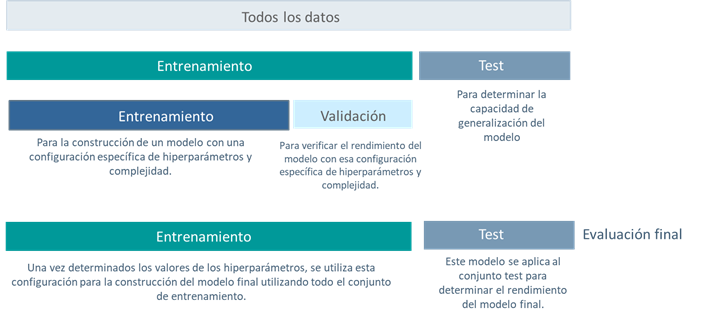

In [78]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

In [84]:
# Fijemos un valor de max_depth en 2, construyamos el modelo y probemos sobre validación. Utilicemos la exactitud como métrica 
# de rendimiento para hacer la selección. Te sugerimos como ejercicio autónomo utilizar como métrica f1-score y justiricar su uso
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 2, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)

In [85]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_trainval)
y_pred_val = arbol.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre validación: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 0.85
Exactitud sobre validación: 0.81


In [86]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)
y_pred_train = arbol.predict(X_trainval)
y_pred_val = arbol.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 0.91
Exactitud sobre test: 0.82


In [87]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)
y_pred_train = arbol.predict(X_trainval)
y_pred_val = arbol.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 0.94
Exactitud sobre test: 0.83


In [88]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)
y_pred_train = arbol.predict(X_trainval)
y_pred_val = arbol.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.82


In [89]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 20, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)
y_pred_train = arbol.predict(X_trainval)
y_pred_val = arbol.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.81


¿Cuál crees que debería ser la máxima profundidad del árbol para nuestro problema?

Ahora utilicemos la otra opción.

b) Validación cruzada de k-particiones. En este caso el conjunto de entrenamiento se divide en k particiones disjuntas. Luego, se fija un valor de hiperparámetro y se toma como conjunto de validación la primera partición y el resto para entrenar el modelo. Este proceso se repite para cada partición. Al finalizar, se determina el valor promedio de las métricas seleccionadas. Este ciclo se repite sobre diferentes valores del hiperparámetro y se seleccionan aquel que ofrezcan el mejor rendimiento. 

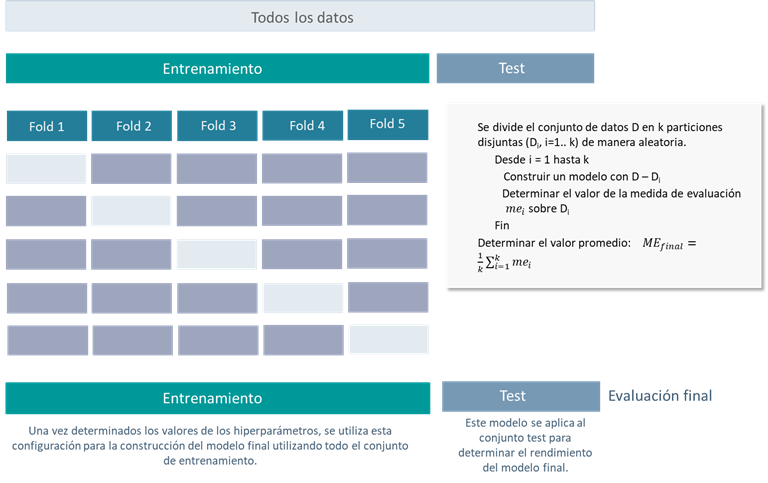

Scikit-learn ofrece algunos métodos que automatizan el proceso de buscar los valores de los hiperparámetros. Uno de ellos es GridSearchCV, el cual se basa en la validación cruzada de k-particiones. Veamos cómo utilizarlo.

In [90]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [91]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20]}

In [92]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [93]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20]})

In [94]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [95]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.91
Exactitud sobre test: 0.80


In [96]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       245
           1       0.35      0.22      0.27        49

    accuracy                           0.80       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.77      0.80      0.78       294



¿Qué puede estar pasando? ¿Crees que el desbalance de las clases puede afectar los resultados?